# Exploratory Data Analysis (EDA) – E-commerce Fraud Data

## Objective
The objective of this notebook is to explore and understand the e-commerce transaction dataset used for fraud detection.  
This includes:
- Inspecting the structure and quality of the data
- Cleaning and correcting data issues
- Analyzing class imbalance
- Performing univariate and bivariate analysis
- Enriching the dataset with geolocation information based on IP addresses

The insights gained from this analysis will guide feature engineering and model development in later tasks.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
print("Succussfully imported dependencies")

Succussfully imported dependencies


In [5]:
print("Load data")
fraud_df = pd.read_csv("./data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("./data/raw/IpAddress_to_Country.csv")

Load data


In [6]:
print("Preview of the data")
fraud_df.head()

Preview of the data


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
print("Dataset Structure & Data Types")
fraud_df.info()

Dataset Structure & Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### Initial Observations
From the dataset structure, we observe:
- A mix of numerical, categorical, and timestamp-based features
- `signup_time` and `purchase_time` are stored as strings and require conversion to datetime
- The target variable `class` indicates whether a transaction is fraudulent (1) or legitimate (0)
- Further inspection is required to check for missing values and duplicates

In [8]:
print("Statistical Summary")
fraud_df.describe()

Statistical Summary


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [9]:
print("Check Missing Values")
fraud_df.isnull().sum()

Check Missing Values


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

### Missing Values Handling
The dataset contains no significant missing values across its features.  
Since the presence of missing values is non-existent, no imputation is required, and all records are retained for further analysis.

In [10]:
print("Check for duplicates")
fraud_df.duplicated().sum()

Check for duplicates


np.int64(0)

In [12]:
print("Remove duplicates if any")
fraud_df = fraud_df.drop_duplicates()

Remove duplicates if any


### Duplicate Records
Duplicate rows were identified and removed to ensure data integrity.  
Removing duplicates prevents biased learning caused by repeated transactions and improves the reliability of downstream analysis.

In [14]:
print("Correct Data types")
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])

Correct Data types


In [15]:
print("Verify data types")
fraud_df.dtypes

Verify data types


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

### Data Type Corrections
The `signup_time` and `purchase_time` columns were converted to datetime format.  
This enables time-based analysis such as transaction timing, user behavior over time, and feature engineering in later stages.


In [16]:
print("Class distribution analysis")
fraud_df["class"].value_counts()

Class distribution analysis


class
0    136961
1     14151
Name: count, dtype: int64

Visualize class imbalance


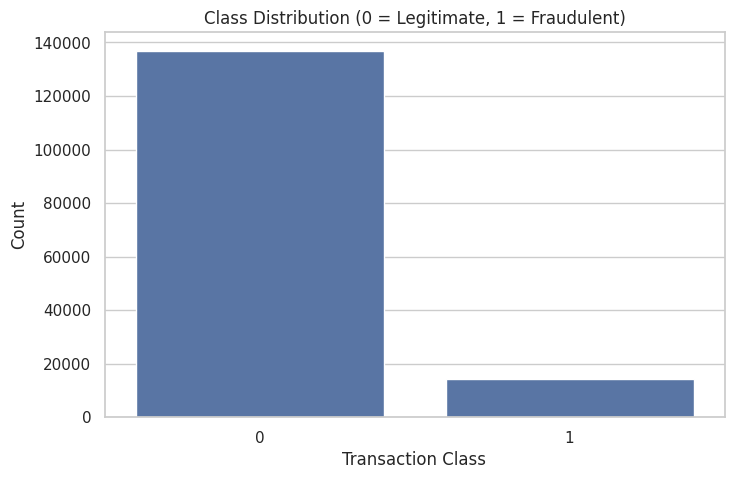

In [17]:
print("Visualize class imbalance")
sns.countplot(x="class", data=fraud_df)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraudulent)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

### Class Imbalance Analysis
The dataset is highly imbalanced, with fraudulent transactions representing a very small proportion of the total data.

This is typical in real-world fraud detection scenarios.  
As a result:
- Accuracy alone is not a reliable evaluation metric
- Precision, recall, F1-score, and AUC-based metrics will be more appropriate during modeling
- Special techniques such as resampling or class weighting may be required

## Univariate Analysis
This section examines the distribution of key individual features to understand general transaction behavior and detect potential anomalies.

Purchase value distribution


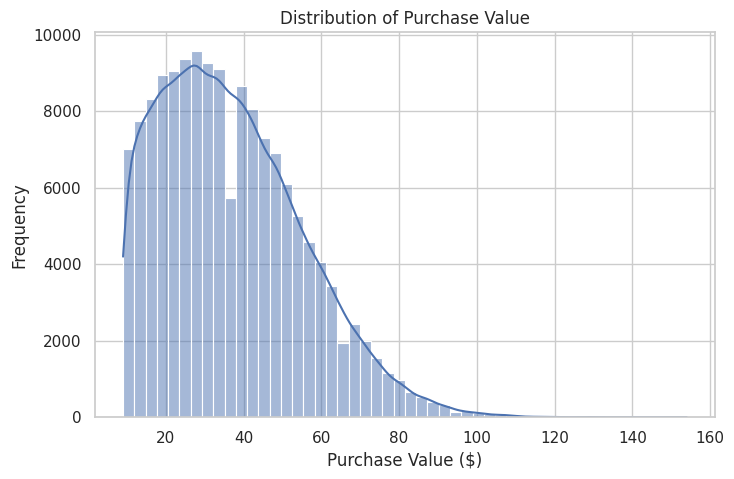

In [19]:
print("Purchase value distribution")
sns.histplot(fraud_df["purchase_value"], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.xlabel("Purchase Value ($)")
plt.ylabel("Frequency")
plt.show()

Age distribution


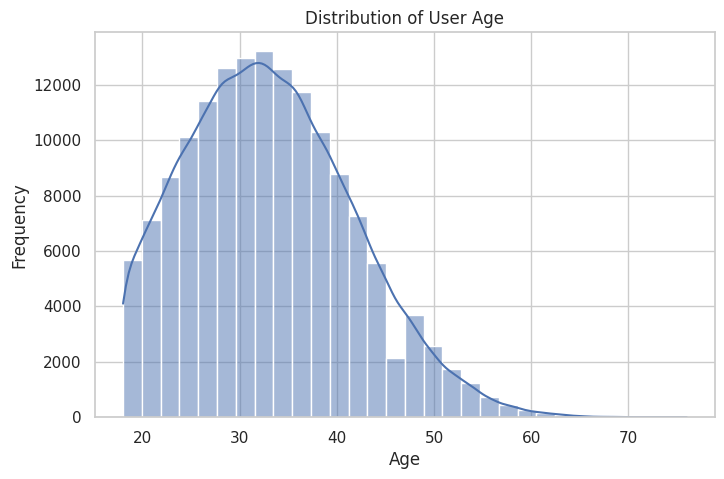

In [20]:
print("Age distribution")
sns.histplot(fraud_df["age"], bins=30, kde=True)
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Transaction Source Distribution


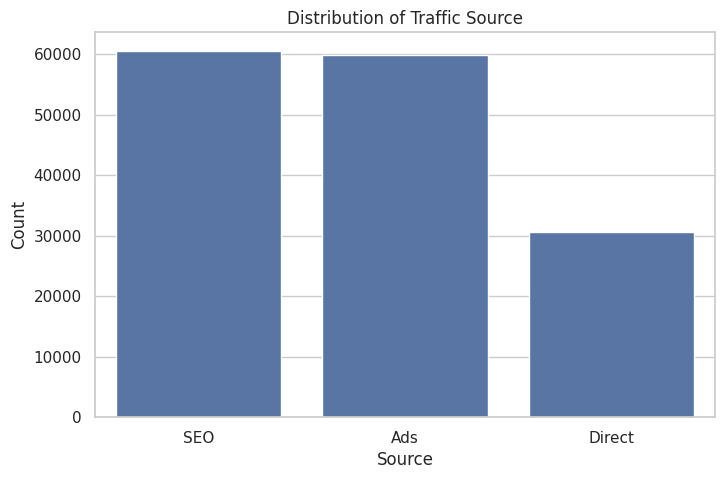

In [21]:
print("Transaction Source Distribution")
sns.countplot(x="source", data=fraud_df)
plt.title("Distribution of Traffic Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

Browser distribution


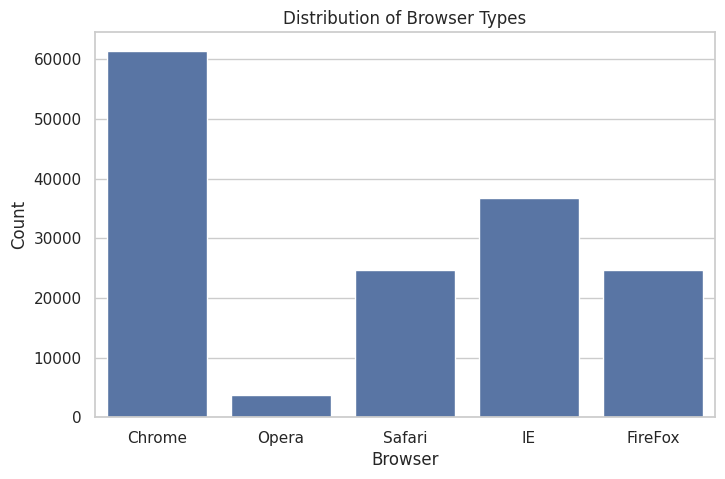

In [22]:
print("Browser distribution")
sns.countplot(x="browser", data=fraud_df)
plt.title("Distribution of Browser Types")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.show()

### Univariate Analysis Insights
- Purchase values show a right-skewed distribution, indicating the presence of high-value outliers
- User ages are concentrated within a reasonable adult range
- Certain traffic sources and browsers dominate transaction volume
- These distributions provide context for later fraud vs non-fraud comparisons

## Bivariate Analysis
This section explores the relationship between key features and the fraud label to identify patterns associated with fraudulent behavior.

Purchase value vs Fraud class


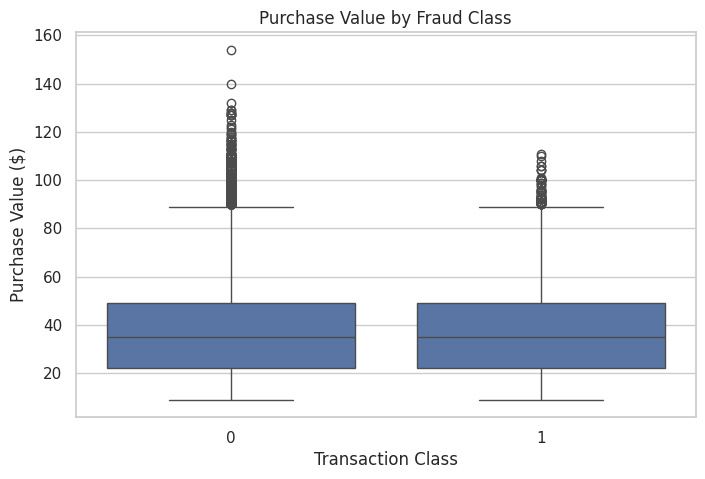

In [23]:
print("Purchase value vs Fraud class")
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value by Fraud Class")
plt.xlabel("Transaction Class")
plt.ylabel("Purchase Value ($)")
plt.show()

Age vs Fraud class


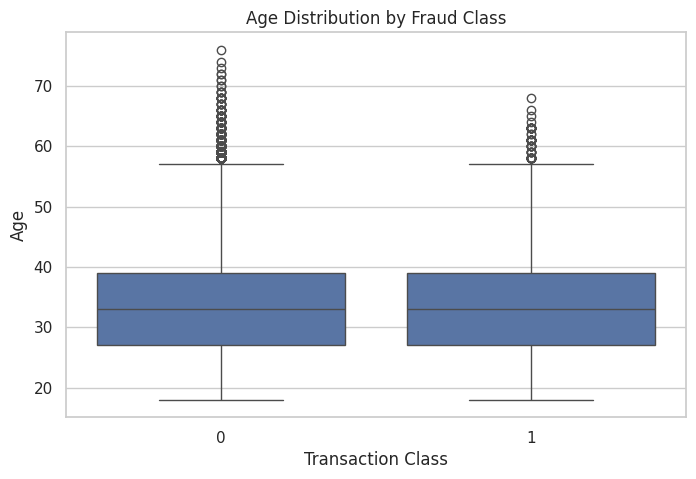

In [24]:
print("Age vs Fraud class")
sns.boxplot(x="class", y="age", data=fraud_df)
plt.title("Age Distribution by Fraud Class")
plt.xlabel("Transaction Class")
plt.ylabel("Age")
plt.show()

### Bivariate Analysis Insights
- Fraudulent transactions tend to exhibit different purchase value patterns compared to legitimate ones
- Age alone does not appear to be a strong discriminator but may contribute in combination with other features
- These observations motivate the creation of interaction and time-based features in later steps

## Next Steps
The next phase of this analysis will integrate geolocation data by mapping IP addresses to countries.  
This will enable country-level fraud pattern analysis, which is a key requirement of Task 1.

## Geolocation Analysis (IP Address to Country Mapping)

Fraud patterns often vary by geographic region.  
In this section, we enrich the transaction dataset by mapping IP addresses to their corresponding countries using a range-based lookup table.

In [25]:
print("Inspect IP dataset")
ip_df.head()

Inspect IP dataset


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [26]:
print('IP dataset structure')
ip_df.info()

IP dataset structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### IP Mapping Dataset
The IP-to-country dataset contains:
- Lower and upper bounds of IP address ranges
- The country associated with each IP range

To match transactions with countries:
- Transaction IP addresses must be converted to integers
- A range-based lookup will be applied

In [ ]:
print("Convert IP Columns to Integers")
ip_df["lower_bound_ip_address"] = ip_df["lower_bound_ip_address"].astype(int)
ip_df["upper_bound_ip_address"] = ip_df["upper_bound_ip_address"].astype(int)

Convert IP Columns to Integers
        lower_bound_ip_address  upper_bound_ip_address    country
0                     16777216                16777471  Australia
1                     16777472                16777727      China
2                     16777728                16778239      China
3                     16778240                16779263  Australia
4                     16779264                16781311      China
...                        ...                     ...        ...
138841              3758092288              3758093311  Hong Kong
138842              3758093312              3758094335      India
138843              3758095360              3758095871      China
138844              3758095872              3758096127  Singapore
138845              3758096128              3758096383  Australia

[138846 rows x 3 columns]


In [30]:
print("Convert Transaction IP to Integer")
fraud_df["ip_address"] = fraud_df["ip_address"].astype(int)

Convert Transaction IP to Integer


In [31]:
print("Sort IP Dataset for Efficient Lookup")
ip_df = ip_df.sort_values("lower_bound_ip_address").reset_index(drop=True)

Sort IP Dataset for Efficient Lookup


In [32]:
print("Create IP → Country Mapping Function")
def map_ip_to_country(ip):
    match = ip_df[
        (ip_df["lower_bound_ip_address"] <= ip) &
        (ip_df["upper_bound_ip_address"] >= ip)
    ]
    if not match.empty:
        return match.iloc[0]["country"]
    return "Unknown"


Create IP → Country Mapping Function


In [33]:
print("Apply country mapping")
fraud_df["country"] = fraud_df["ip_address"].apply(map_ip_to_country)

Apply country mapping


In [35]:
print("Check country mapping results")
fraud_df["country"].value_counts().head(10)

Check country mapping results


country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64

### Country Mapping Validation
Most transactions were successfully mapped to countries using IP ranges.
Transactions that did not fall into any defined IP range were labeled as **"Unknown"**.

## Fraud Analysis by Country
This section analyzes how fraud occurrence varies across different countries.

In [36]:
print("Fraud rate by country")
country_fraud = (
    fraud_df
    .groupby("country")["class"]
    .agg(["count", "sum"])
    .rename(columns={"sum": "fraud_cases"})
)

country_fraud["fraud_rate"] = country_fraud["fraud_cases"] / country_fraud["count"]

Fraud rate by country


In [37]:
print("Top conutries by fraud rate")
country_fraud.sort_values("fraud_rate", ascending=False).head(10)

Top conutries by fraud rate


,count,fraud_cases,fraud_rate
country,,,
Turkmenistan,1,1,1.000000
Namibia,23,10,0.434783
Sri Lanka,31,13,0.419355
Luxembourg,72,28,0.388889
Virgin Islands (U.S.),3,1,0.333333
Ecuador,106,28,0.264151
Tunisia,118,31,0.262712
Peru,119,31,0.260504
Bolivia,53,13,0.245283


In [40]:
print("Top countries by fraud rate")
country_fraud.sort_values("fraud_cases", ascending=False).head(10)

Top countries by fraud rate


,count,fraud_cases,fraud_rate
country,,,
United States,58049,5551,0.095626
Unknown,21966,1883,0.085723
China,12038,1043,0.086642
Japan,7306,715,0.097865
United Kingdom,4490,477,0.106236
Korea Republic of,4162,380,0.091302
Canada,2975,348,0.116975
France,3161,300,0.094907
Brazil,2961,270,0.091185


Visualize fraud rate by country - Top 10


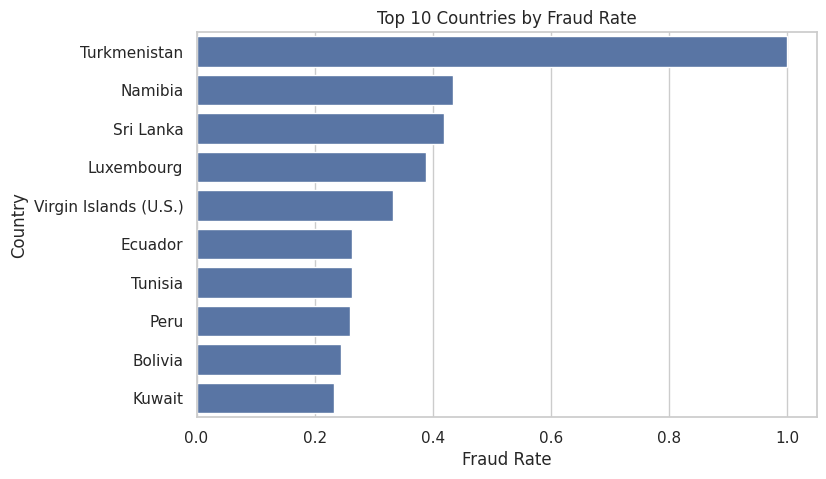

In [41]:
print("Visualize fraud rate by country - Top 10")
top_countries = country_fraud.sort_values(
    "fraud_rate", ascending=False
).head(10)

sns.barplot(
    x=top_countries["fraud_rate"],
    y=top_countries.index
)

plt.title("Top 10 Countries by Fraud Rate")
plt.xlabel("Fraud Rate")
plt.ylabel("Country")
plt.show()


### Geolocation Insights
- Fraud rates vary significantly across countries
- Some countries exhibit high fraud rates despite lower transaction volume
- Geographic features can provide strong predictive power when combined with transaction behavior
- Country-level risk signals should be incorporated into modeling and feature engineering stages

## Task 1 Summary – Fraud_Data.csv

Completed steps:
- Data cleaning (duplicates removal, type correction)
- Missing value analysis with justification
- Univariate and bivariate exploratory analysis
- Class imbalance assessment
- IP-based geolocation enrichment
- Country-level fraud pattern analysis

This dataset is now ready for feature engineering and model development.